In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [2]:
mydata = pd.read_csv('datasets/heart_2020_cleaned.csv')

In [3]:
mydata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
mydata.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
mydata.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
mydata.shape

(319795, 18)

In [7]:
#stroke = felç, DiffWalking = yurumede zorluk, race = Irk, kidney disease = bobrek hastaligi
print(mydata['HeartDisease'].value_counts())



HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [8]:
print(mydata['HeartDisease'].isnull().sum())


0


In [9]:
mydata['HeartDisease'] = mydata['HeartDisease'].map({'Yes': 1, 'No': 0})


In [10]:
mydata['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
mydata['Smoking'].isnull().sum()

np.int64(0)

In [12]:
#bazi veriler kalp krizinde direkt anlamlidir. 
#Ornegin ssigara icip icmemesi kalp krizini tetikleyen unsurlardandir bunlarda label encoding yeterli olacaktir
mydata['Smoking'] = mydata['Smoking'].map({'Yes': 1, 'No':0})

In [13]:
mydata['AlcoholDrinking'] = mydata['AlcoholDrinking'].map({'Yes': 1, 'No': 0})


In [14]:
mydata['HeartDisease'].value_counts(normalize=True)

HeartDisease
0    0.914405
1    0.085595
Name: proportion, dtype: float64

In [15]:
mydata['Stroke'] = mydata['Stroke'].map({'Yes':1,'No':0}) 

In [16]:
mydata['PhysicalHealth'].describe()


count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

In [17]:
mydata['PhysicalHealth'].unique()


array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [18]:
mydata['MentalHealth'].describe()


count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [19]:
mydata['MentalHealth'].unique()


array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [20]:
mydata['DiffWalking'].isnull().sum()

np.int64(0)

In [21]:
mydata['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
mydata['DiffWalking'] = mydata['DiffWalking'].map({'Yes':1,'No':0})

In [23]:
mydata['Sex'] = mydata['Sex'].map({'Female': 0, 'Male': 1})

In [24]:
mydata['AgeCategory'].unique()


array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [25]:
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
mydata['AgeCategory'] = mydata['AgeCategory'].map(age_mapping)

In [26]:
mydata['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [27]:
mydata = pd.get_dummies(mydata, columns=['Race'], prefix='Race', drop_first=True)

In [28]:
print(mydata.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')


In [29]:
mydata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,Very good,5.0,Yes,No,Yes,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,Very good,7.0,No,No,No,False,False,False,False,True
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,Fair,8.0,Yes,No,No,False,False,False,False,True
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,Good,6.0,No,No,Yes,False,False,False,False,True
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,Very good,8.0,No,No,No,False,False,False,False,True


In [30]:
mydata['Diabetic'].value_counts()

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

In [31]:
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}

mydata['Diabetic'] = mydata['Diabetic'].map(diabetic_mapping)

In [32]:
mydata['PhysicalActivity'] = mydata['PhysicalActivity'].map({'Yes': 1, 'No': 0})

In [33]:
mydata['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [34]:
mydata['GenHealth'].isnull().sum()

np.int64(0)

In [35]:
mydata['GenHealth'] = mydata['GenHealth'].map({
    'Excellent': 4,
    'Very good': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
})

In [36]:
mydata['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
mydata['Asthma'] = mydata['Asthma'].map({'Yes': 1, 'No': 0})
mydata['KidneyDisease'] = mydata['KidneyDisease'].map({'Yes': 1, 'No': 0})
mydata['SkinCancer'] = mydata['SkinCancer'].map({'Yes': 1, 'No': 0})

In [38]:
mydata.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
Race_Asian          0
Race_Black          0
Race_Hispanic       0
Race_Other          0
Race_White          0
dtype: int64

In [39]:
mydata['GenHealth'].unique()

array([3, 1, 2, 0, 4])

In [41]:
#her bir column icin heart disease ile iliskisine bakacagiz
categorical_cols = [
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'PhysicalActivity',
    'DiffWalking',
    'Sex',
    'AgeCategory',
    'Diabetic',
    'GenHealth',
    'Asthma',
    'KidneyDisease',
    'SkinCancer'
]

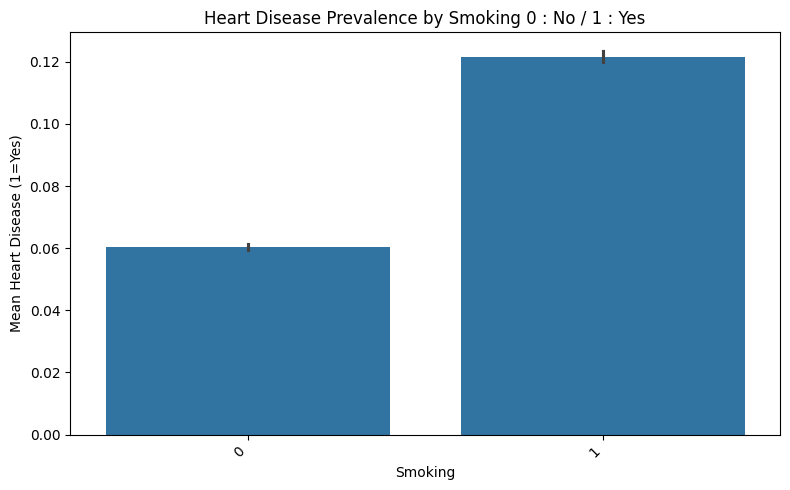

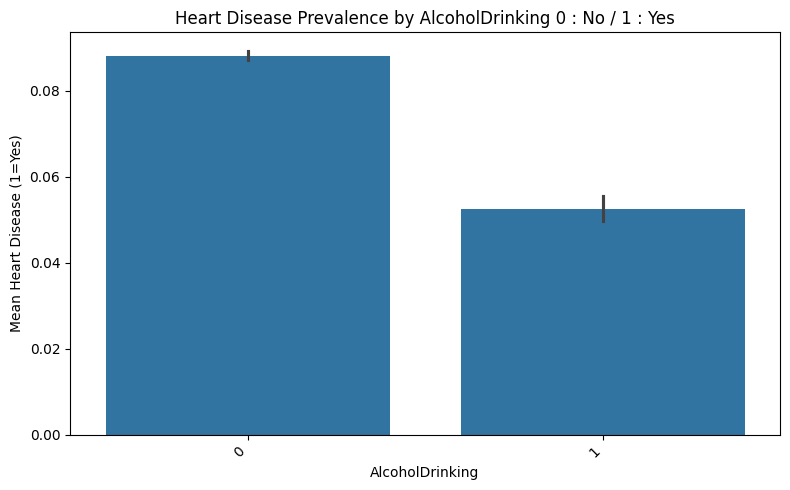

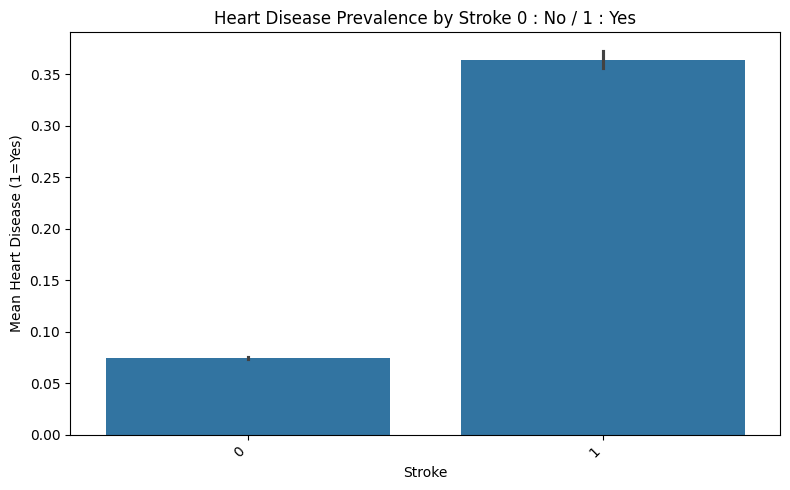

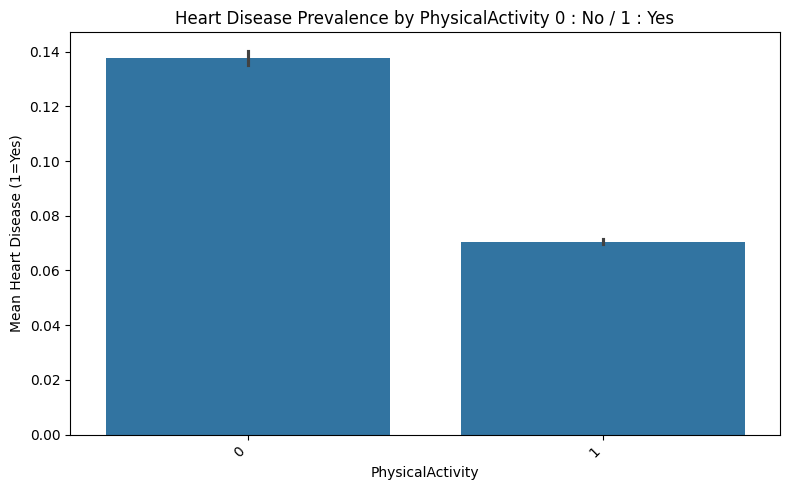

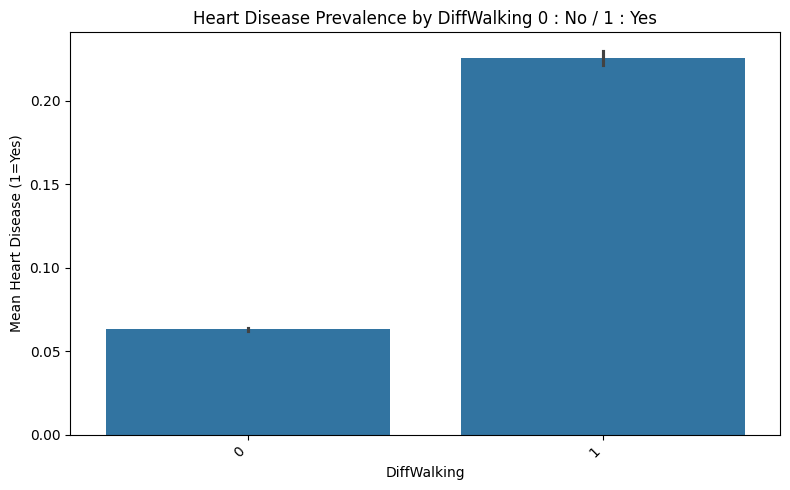

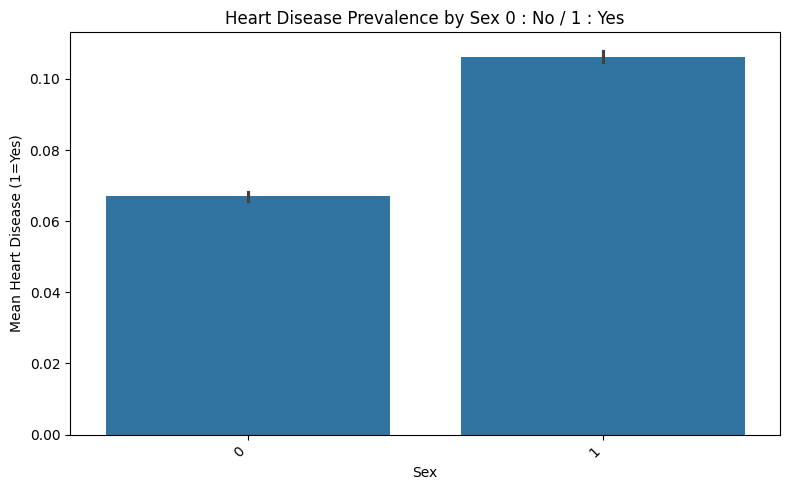

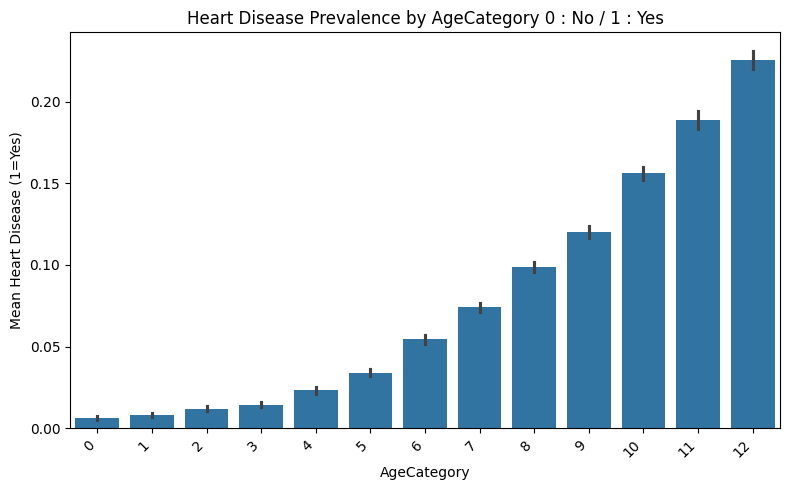

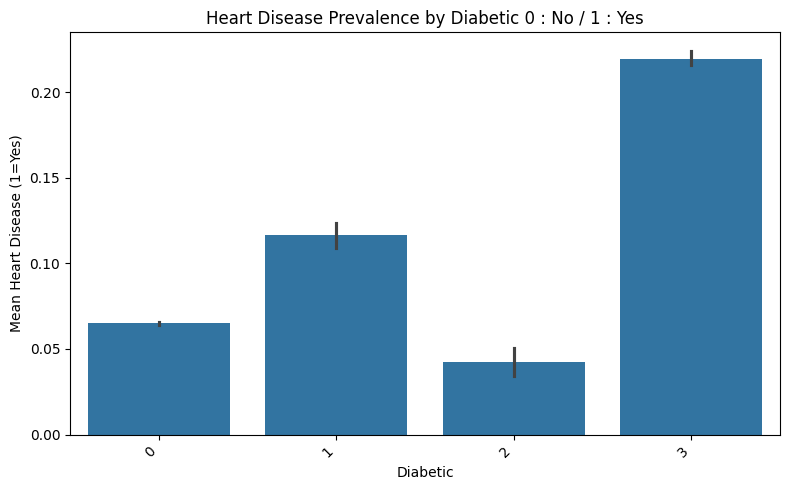

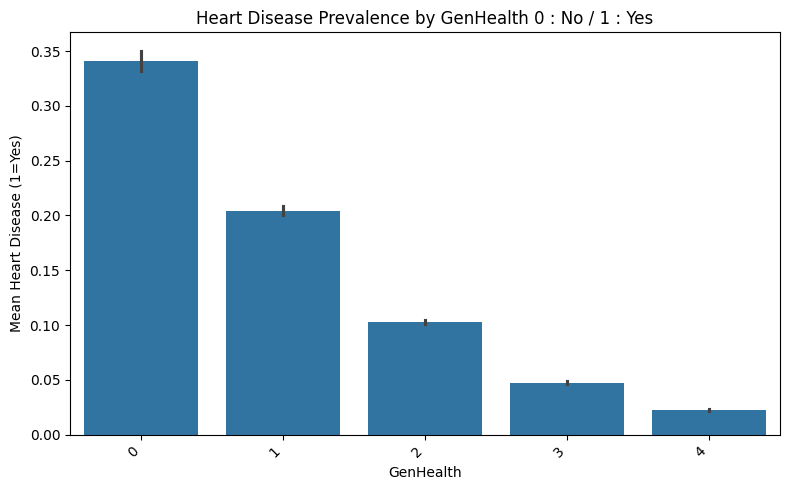

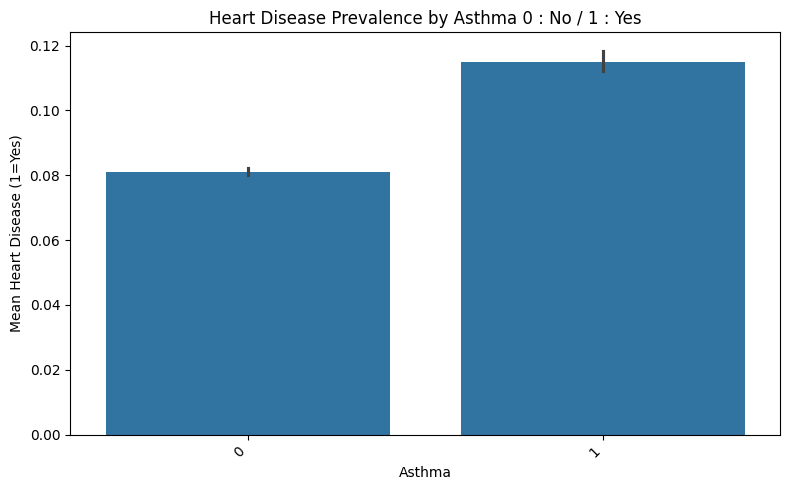

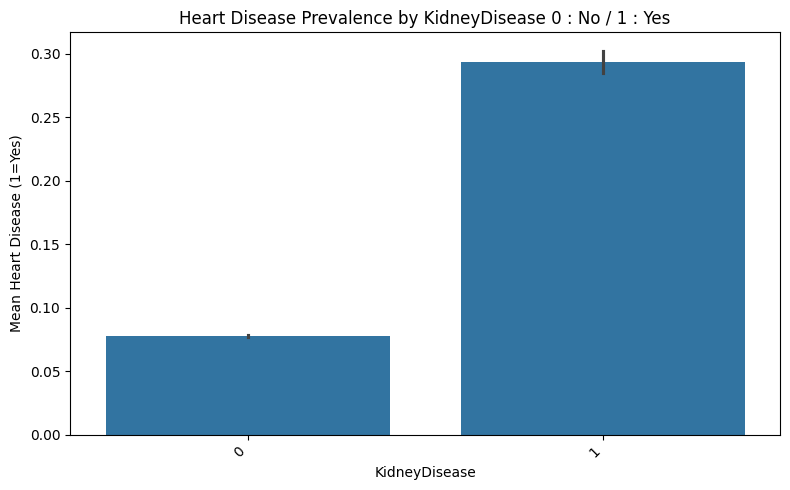

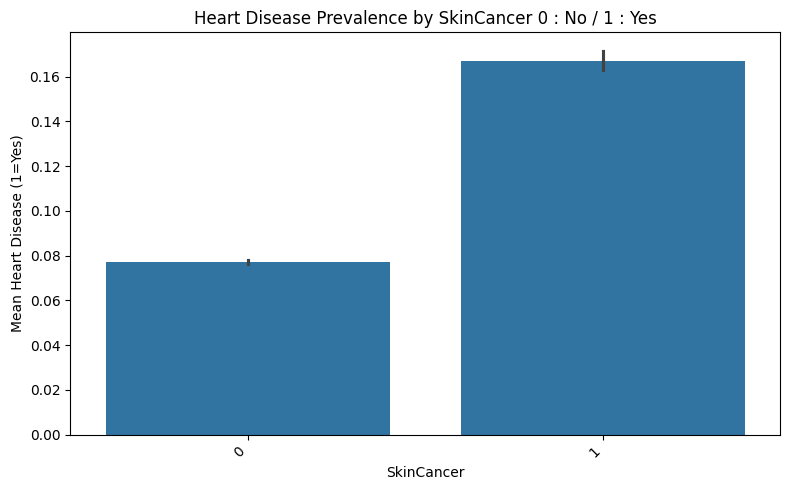

In [43]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    # Bar plot kullanarak her kategorideki HeartDisease (1 olanların ortalaması) prevalansını gösterelim
    sns.barplot(x=col, y='HeartDisease', data=mydata)
    plt.title(f'Heart Disease Prevalence by {col} 0 : No / 1 : Yes')
    plt.xlabel(col)
    plt.ylabel('Mean Heart Disease (1=Yes)')
    plt.xticks(rotation=45, ha='right') # Uzun etiketler için döndürme
    plt.tight_layout() # Düzenin sıkışmasını önlemek için
    plt.show()

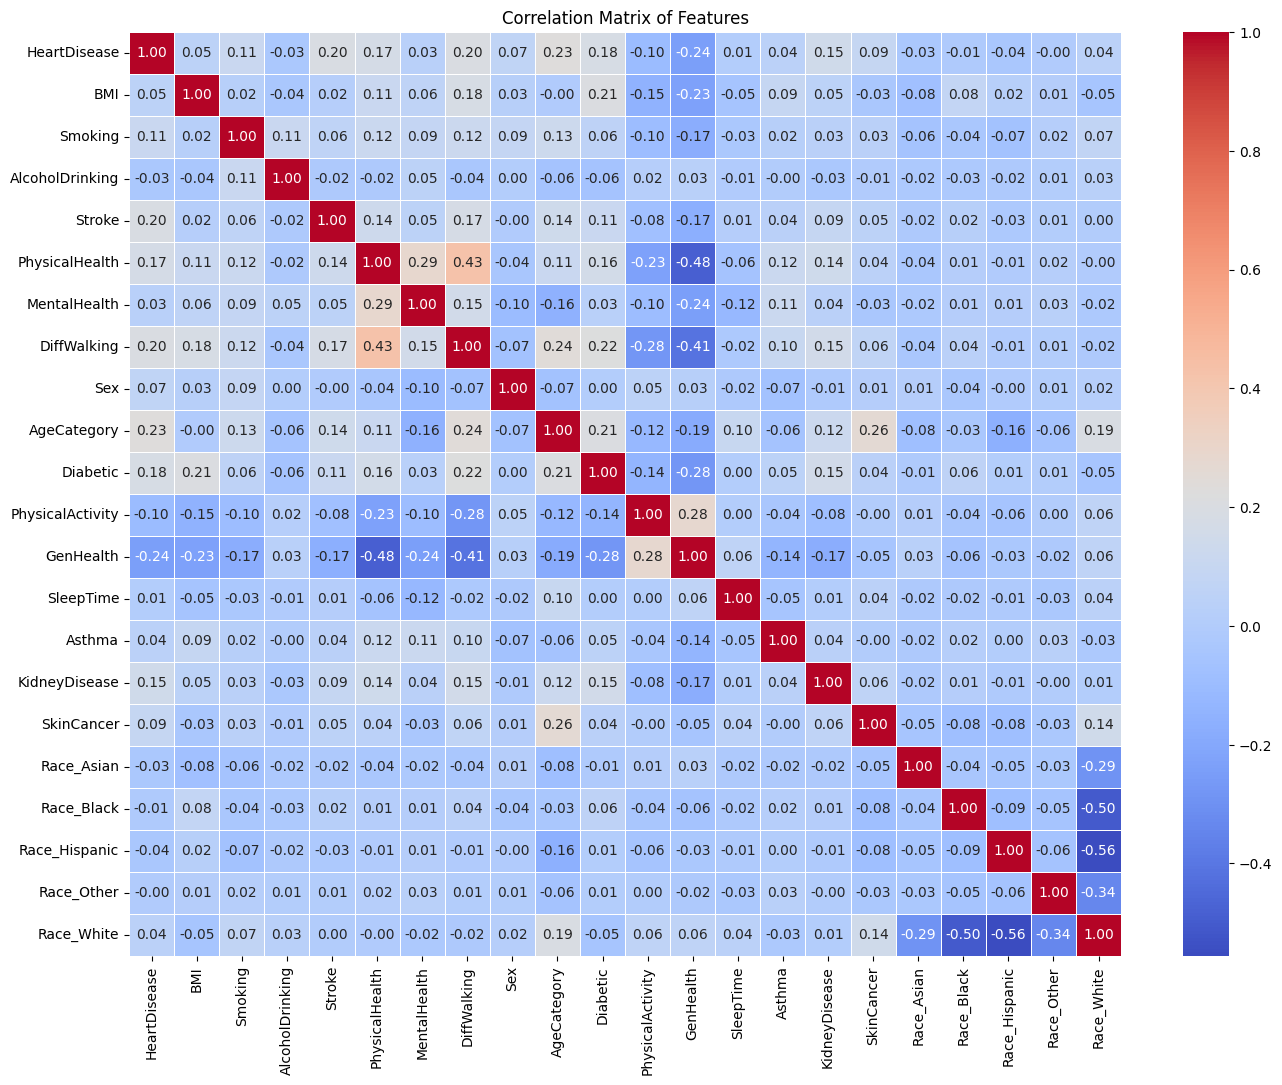

In [45]:
correlation_matrix = mydata.corr()

plt.figure(figsize=(16, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [46]:
print("\nHeartDisease ile diğer özelliklerin korelasyonları:")
print(correlation_matrix['HeartDisease'].sort_values(ascending=False))


HeartDisease ile diğer özelliklerin korelasyonları:
HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
Diabetic            0.180826
PhysicalHealth      0.170721
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race_White          0.040121
MentalHealth        0.028591
SleepTime           0.008327
Race_Other         -0.003039
Race_Black         -0.010156
Race_Asian         -0.030262
AlcoholDrinking    -0.032080
Race_Hispanic      -0.036163
PhysicalActivity   -0.100030
GenHealth          -0.243182
Name: HeartDisease, dtype: float64


In [47]:
y = mydata['HeartDisease']
X = mydata.drop('HeartDisease', axis=1)

print("X (Özellikler) ilk 5 satır:")
print(X.head())
print("\ny (Hedef Değişken) ilk 5 değer:")
print(y.head())

X (Özellikler) ilk 5 satır:
     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  16.60        1                0       0             3.0          30.0   
1  20.34        0                0       1             0.0           0.0   
2  26.58        1                0       0            20.0          30.0   
3  24.21        0                0       0             0.0           0.0   
4  23.71        0                0       0            28.0           0.0   

   DiffWalking  Sex  AgeCategory  Diabetic  ...  GenHealth  SleepTime  Asthma  \
0            0    0            7         3  ...          3        5.0       1   
1            0    0           12         0  ...          3        7.0       0   
2            0    1            9         3  ...          1        8.0       1   
3            0    0           11         0  ...          2        6.0       0   
4            1    0            4         0  ...          3        8.0       0   

   KidneyDisease  SkinCancer

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)
print("y_train boyutu:", y_train.shape)
print("y_test boyutu:", y_test.shape)

print("\ny_train sınıf dağılımı (yüzde):")
print(y_train.value_counts(normalize=True))
print("\ny_test sınıf dağılımı (yüzde):")
print(y_test.value_counts(normalize=True))

print("\nX_train ilk 5 satır (boolean dönüşümü sonrası):")
print(X_train.head())
print("\nX_train sütun veri tipleri:")
print(X_train.dtypes)

X_train boyutu: (223856, 21)
X_test boyutu: (95939, 21)
y_train boyutu: (223856,)
y_test boyutu: (95939,)

y_train sınıf dağılımı (yüzde):
HeartDisease
0    0.914405
1    0.085595
Name: proportion, dtype: float64

y_test sınıf dağılımı (yüzde):
HeartDisease
0    0.914404
1    0.085596
Name: proportion, dtype: float64

X_train ilk 5 satır (boolean dönüşümü sonrası):
          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
21568   23.44        1                0       0             0.0           1.0   
140241  23.11        0                0       0             0.0           0.0   
54873   35.51        0                0       0             2.0           1.0   
20145   21.79        0                0       0             0.0           0.0   
185759  47.59        1                0       0            30.0          20.0   

        DiffWalking  Sex  AgeCategory  Diabetic  ...  GenHealth  SleepTime  \
21568             0    0            9         0  ...          2    

In [51]:
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train_scaled = X_train.copy() 
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("X_train_scaled (ölçeklendirme sonrası) ilk 5 satır:")
print(X_train_scaled.head())
print("\nX_train_scaled sayısal sütunlar için ortalama ve std (beklenen: ~0 ve ~1):")
print(X_train_scaled[numerical_cols].describe().loc[['mean', 'std']])

X_train_scaled (ölçeklendirme sonrası) ilk 5 satır:
             BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
21568  -0.768254        1                0       0       -0.424410   
140241 -0.820216        0                0       0       -0.424410   
54873   1.132294        0                0       0       -0.173098   
20145  -1.028064        0                0       0       -0.424410   
185759  3.034416        1                0       0        3.345265   

        MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  ...  GenHealth  \
21568      -0.365854            0    0            9         0  ...          2   
140241     -0.491208            0    1            8         0  ...          4   
54873      -0.365854            0    0           11         0  ...          2   
20145      -0.491208            0    0            6         2  ...          4   
185759      2.015858            1    1            5         0  ...          0   

        SleepTime  Asthma  KidneyDisease

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear') # 'liblinear' küçük datasetler için iyi bir solver

# Modeli eğitim verileriyle eğitelim
model.fit(X_train_scaled, y_train)

print("Lojistik Regresyon modeli başarıyla eğitildi!")

Lojistik Regresyon modeli başarıyla eğitildi!


In [55]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix



--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     87727
           1       0.22      0.78      0.35      8212

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.60     95939
weighted avg       0.91      0.75      0.80     95939


--- Karışıklık Matrisi ---


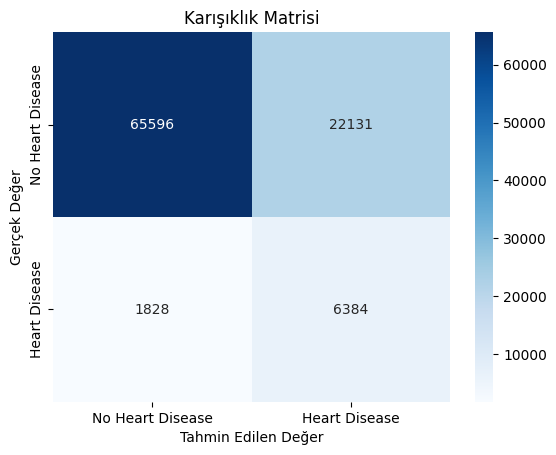

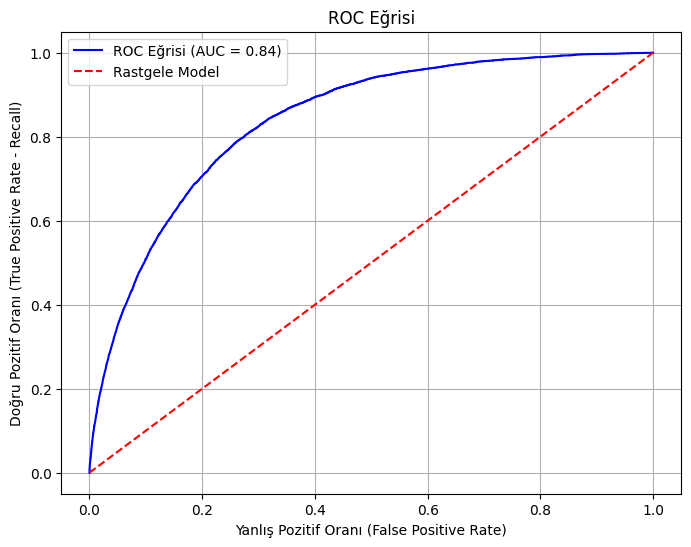


ROC AUC Skoru: 0.8393


In [56]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Pozitif sınıf (1) için olasılıklar

# Sınıflandırma Raporu
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix)
print("\n--- Karışıklık Matrisi ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.title('Karışıklık Matrisi')
plt.show()

# ROC Eğrisi ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Eğrisi (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Rastgele Model')
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate - Recall)')
plt.title('ROC Eğrisi')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nROC AUC Skoru: {auc:.4f}")

In [57]:
logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000) # max_iter'ı artırmak yakınsama sorunlarını önleyebilir

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularizasyon gücünü kontrol eden parametre
    'solver': ['liblinear', 'lbfgs']     # Optimizasyon algoritması. 'liblinear' küçük datasetler için iyi, 'lbfgs' daha büyükler için.
}
grid_search = GridSearchCV(estimator=logistic_model,
                           param_grid=param_grid,
                           cv=5, # 5-fold çapraz doğrulama
                           scoring='roc_auc', # ROC AUC skorunu maksimize etmeye çalışıyoruz
                           verbose=2,
                           n_jobs=-1)

# Grid Search'i eğitim verisi üzerinde çalıştıralım
print("Grid Search başlatılıyor...")
grid_search.fit(X_train_scaled, y_train)
print("Grid Search tamamlandı!")

# En iyi parametreleri ve en iyi skoru gösterelim
print("\nEn iyi parametreler:", grid_search.best_params_)
print("En iyi ROC AUC skoru (çapraz doğrulama ile):", grid_search.best_score_)

# En iyi modeli alalım
best_logistic_model = grid_search.best_estimator_

# Test seti üzerinde en iyi modelin performansını değerlendirelim
print("\n--- En iyi Lojistik Regresyon Modeli ile Test Seti Değerlendirmesi ---")
y_pred_best = best_logistic_model.predict(X_test_scaled)
y_pred_proba_best = best_logistic_model.predict_proba(X_test_scaled)[:, 1]

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_best))

auc_best = roc_auc_score(y_test, y_pred_proba_best)
print(f"\nROC AUC Skoru (en iyi model): {auc_best:.4f}")

Grid Search başlatılıyor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Grid Search tamamlandı!

En iyi parametreler: {'C': 100, 'solver': 'liblinear'}
En iyi ROC AUC skoru (çapraz doğrulama ile): 0.8415643312861218

--- En iyi Lojistik Regresyon Modeli ile Test Seti Değerlendirmesi ---

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     87727
           1       0.22      0.78      0.35      8212

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.60     95939
weighted avg       0.91      0.75      0.80     95939


ROC AUC Skoru (en iyi model): 0.8394


In [59]:
from sklearn.metrics import precision_recall_curve

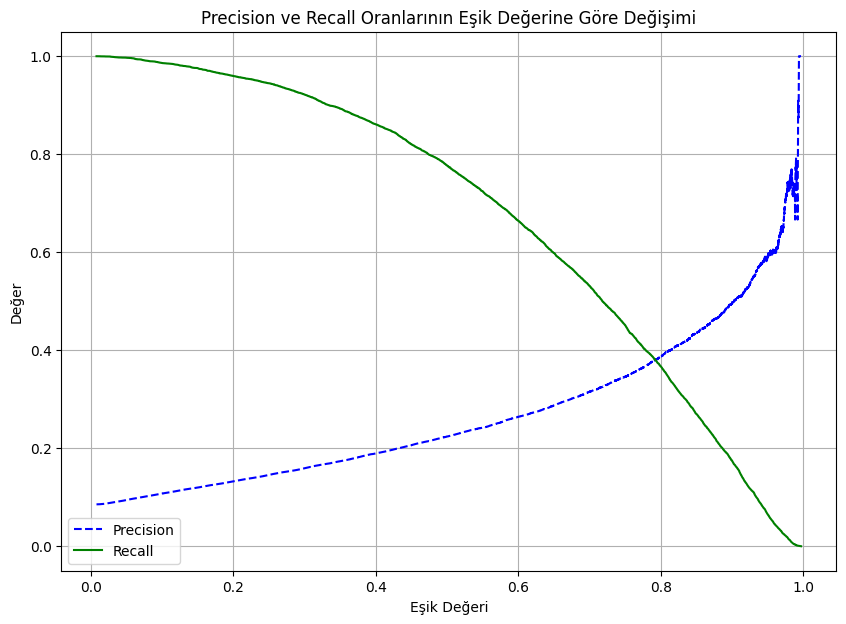


--- Yeni Eşik (0.65) ile Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     87727
           1       0.29      0.60      0.39      8212

    accuracy                           0.84     95939
   macro avg       0.62      0.73      0.65     95939
weighted avg       0.90      0.84      0.86     95939


--- Yeni Eşik (0.65) ile Karışıklık Matrisi ---


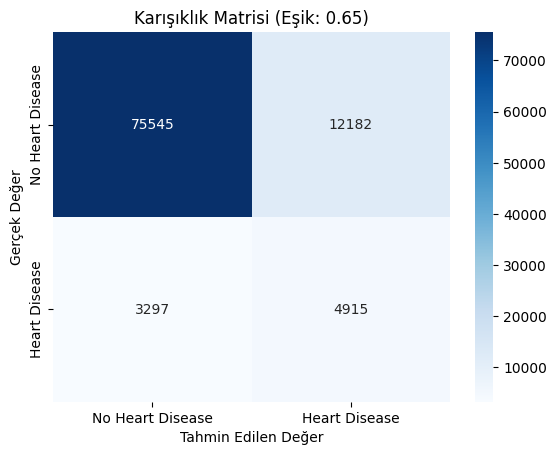

In [62]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_best)

plt.figure(figsize=(10, 7))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Eşik Değeri')
plt.ylabel('Değer')
plt.title('Precision ve Recall Oranlarının Eşik Değerine Göre Değişimi')
plt.legend()
plt.grid(True)
plt.show()

# 2. Belirli Eşik Değerlerini Deneyelim ve Sonuçları Görelim
# Varsayılan 0.5 ile olan sonuçları gördük. Şimdi, örneğin Precision'ı artırmak için eşiği biraz yükseltmeyi deneyelim.
# Mesela, grafiğe bakarak precision ve recall'un kesiştiği veya istediğiniz dengeyi sağlayan bir eşik seçebilirsiniz.
# İlk olarak 0.5'ten biraz yüksek bir eşik deneyelim, örneğin 0.55 veya 0.6.

# Yeni bir eşik değeri belirleyin (örneğin 0.55)
new_threshold = 0.65 # Bu değeri grafiğe bakarak veya deneme yanılma ile değiştirebilirsiniz.

# Belirlenen yeni eşiğe göre tahminler yapalım
y_pred_new_threshold = (y_pred_proba_best >= new_threshold).astype(int)

print(f"\n--- Yeni Eşik ({new_threshold}) ile Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_new_threshold))

# Yeni eşikle Karışıklık Matrisi (isteğe bağlı)
print(f"\n--- Yeni Eşik ({new_threshold}) ile Karışıklık Matrisi ---")
cm_new = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.title(f'Karışıklık Matrisi (Eşik: {new_threshold})')
plt.show()